In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/IS403.N22/Project/dataset/TSLA_Stock.csv')
df1 = df[['Price']]
df1 = df1.dropna()
df1 = df1.reset_index(drop=True)

# # Split the data into training, testing, and validation sets
# train_size = int(0.7 * len(df1))
# test_size = int(0.2 * len(df1))
# val_size = len(df) - train_size - test_size

# train_data = df1[:train_size]
# test_data = df1[train_size:train_size+test_size]
# val_data = df1[train_size+test_size:]

In [ ]:
choose = 1
# 7:2:1
if choose == 1:
  train_size = int(0.7 * len(df1))
  test_size = int(0.2 * len(df1))
  val_size = len(df) - train_size - test_size

  train_data = df1[:train_size]
  test_data = df1[train_size:train_size+test_size]
  val_data = df1[train_size+test_size:]

# 5:3:2
elif choose == 2:
  train_size = int(0.5 * len(df1))
  test_size = int(0.3 * len(df1))
  val_size = len(df) - train_size - test_size

  train_data = df1[:train_size]
  test_data = df1[train_size:train_size+test_size]
  val_data = df1[train_size+test_size:]

# 6:2:2
elif choose == 3:
  train_size = int(0.6 * len(df1))
  test_size = int(0.2 * len(df1))
  val_size = len(df) - train_size - test_size

  train_data = df1[:train_size]
  test_data = df1[train_size:train_size+test_size]
  val_data = df1[train_size+test_size:]

print("Train: ", train_size)
print("Test: ", test_size)
print("Val: ", val_size)

Train:  974
Test:  278
Val:  140


In [ ]:
train_data.shape, test_data.shape, val_data.shape

((974, 1), (278, 1), (140, 1))

In [ ]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price']).reshape(-1,1)

x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price']).reshape(-1,1)

x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price']).reshape(-1,1)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
test_pred = model.predict(x_test).reshape(-1,1)
val_pred =  model.predict(x_val).reshape(-1,1)

In [ ]:

valid_rmse = np.sqrt(np.mean((val_pred - y_val)**2))
test_rmse = np.sqrt(np.mean((test_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 133.3594677939185
Testing RMSE: 80.2159328034091


In [ ]:

valid_mape = mean_absolute_percentage_error(y_val, val_pred)
test_mape = mean_absolute_percentage_error(y_test, test_pred)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)


Validation MAPE: 0.7945845556836238
Testing MAPE: 0.21699030863865182


In [ ]:
valid_mae = mean_absolute_error(y_val, val_pred)
test_mae = mean_absolute_error(y_test, test_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 130.66113319384885
Testing MAE: 65.21730906083873


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
from datetime import datetime, timedelta

end_date = datetime(2023, 5, 20)
date_list = [end_date - timedelta(days=i-1) for i in range(30)]
next30days = pd.DataFrame({'date': date_list}).sort_values(by='date', ascending=True).reset_index(drop=True)
next30days['date'] = pd.to_datetime(next30days['date'])

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

y_next_30_days = model.predict(x_next_30_days ).reshape(-1,1)

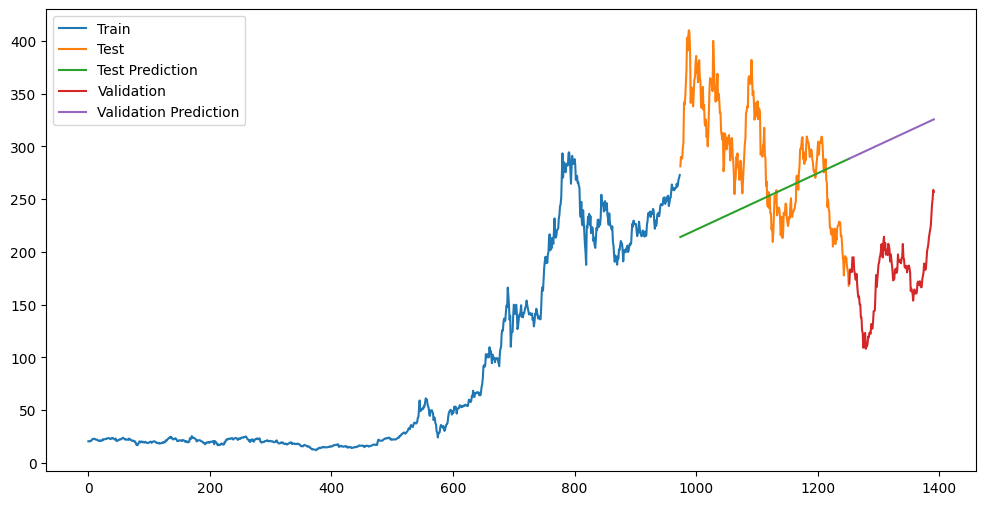

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(y_train, label='Train')

plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Test')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_pred, label='Test Prediction')

plt.plot(range(len(y_train) + len(y_test), len(y_train) + len(y_test) + len(y_val)), y_val, label='Validation')
plt.plot(range(len(y_train) + len(y_test), len(y_train) + len(y_test) + len(y_val)), val_pred, label='Validation Prediction')


#plt.plot(range(len(y_train) + len(y_test) + len(y_val), len(y_train) + len(y_test) + len(y_val) + 30), future_mean.reshape(-1, 1), label='30days_Next')

plt.legend()
plt.show()

In [ ]:

# plt.figure(figsize=(12,6))

# plt.plot(df['Date'][:train_size],y_train, label='Train')

# plt.plot(df['Date'][train_size:train_size+test_size],y_test, label='Test')
# plt.plot(df['Date'][train_size:train_size+test_size],test_pred, label='Test prediction')

# plt.plot(df['Date'][train_size+test_size:],y_val, label='Validation')
# plt.plot(df['Date'][train_size+test_size:],val_pred, label='Validation prediction')

# plt.plot(next30days['date'],y_next_30_days, label='30 next days')

# plt.legend()
# plt.show